In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.describe(include=object)

,City,Date,AQI_Bucket
count,29531,29531,24850
unique,26,2009,6
top,Bengaluru,19-04-2020,Moderate
freq,2009,26,8829


In [ ]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
pip install missingno

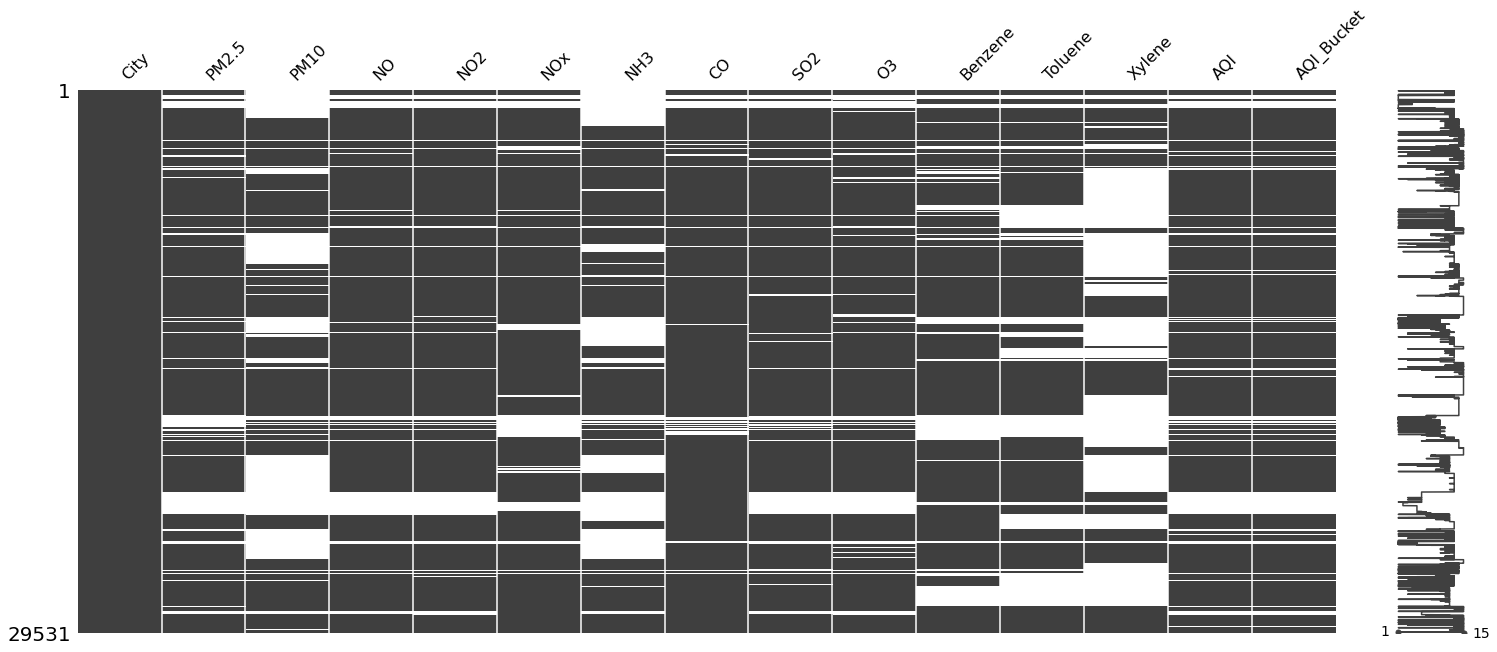

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.dropna(axis='index', how='all',subset=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene'],inplace=True)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-02-01,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-03-01,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-04-01,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-05-01,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [ ]:
print(df.isnull().sum())

City              0
PM2.5          3175
PM10           9717
NO             2159
NO2            2162
NOx            2762
NH3            8905
CO              636
SO2            2431
O3             2599
Benzene        4200
Toluene        6618
Xylene        16686
AQI            3307
AQI_Bucket     3307
dtype: int64


In [ ]:
df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


In [ ]:
print(df.isnull().sum())

City              0
PM2.5             0
PM10           1990
NO                0
NO2               0
NOx             942
NH3            1557
CO                0
SO2               0
O3              158
Benzene        2480
Toluene        3612
Xylene        12443
AQI            3307
AQI_Bucket     3307
dtype: int64


In [ ]:
df.iloc[:, 1:13]=df.fillna(df.mean())
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


In [ ]:
print(df.isnull().sum())

City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           3307
AQI_Bucket    3307
dtype: int64


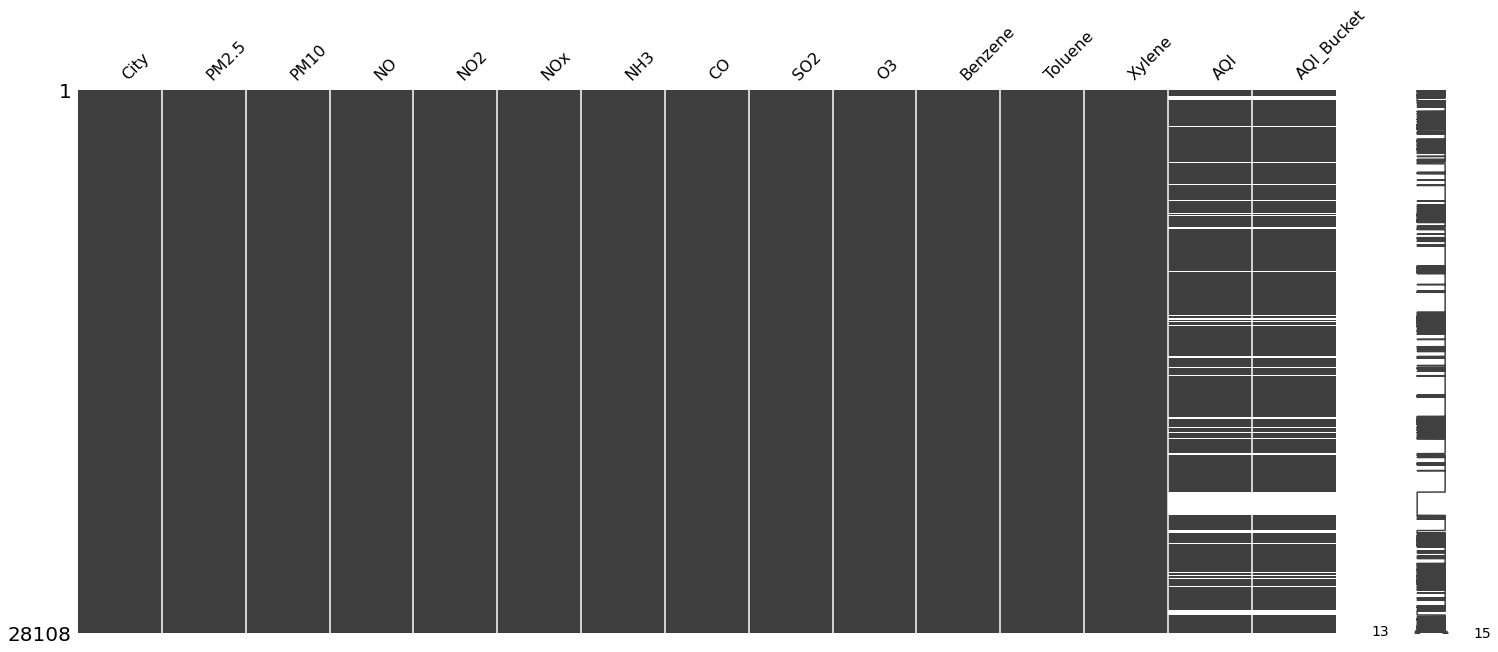

In [ ]:
msno.matrix(df)

In [ ]:
subset_df=df.iloc[:,1:13]
display(subset_df)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
Date,,,,,,,,,,,,
2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000
2015-02-01,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000
2015-03-01,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000
2015-04-01,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000
2015-05-01,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000
2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000
2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000


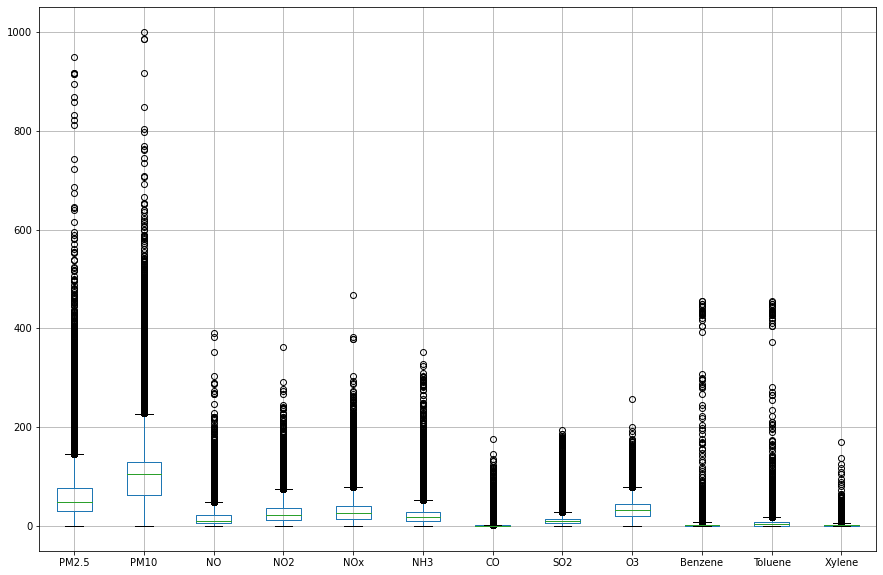

In [ ]:
subset_df.boxplot(figsize=(15,10))

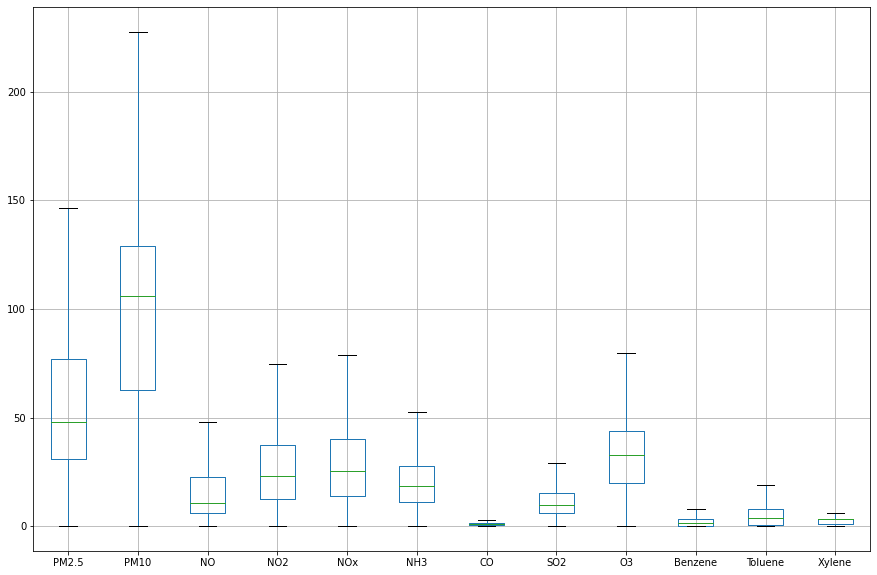

In [ ]:
subset_df.boxplot(figsize=(15,10),showfliers=False)

**Visualization**

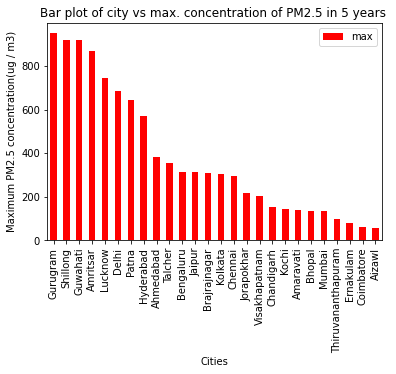

In [ ]:
df1=df.groupby('City')
result = df1['PM2.5'].agg([max])
result.sort_values(by=['max'],ascending=False).plot(kind='bar',color='red')
plt.xlabel("Cities")
plt.ylabel("Maximum PM2.5 concentration(ug / m3)")
plt.title("Bar plot of city vs max. concentration of PM2.5 in 5 years ")
plt.show()

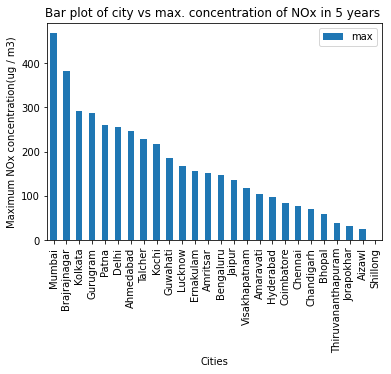

In [ ]:
result = df1['NOx'].agg([max])
result.sort_values(by=['max'],ascending=False).plot(kind='bar')
plt.xlabel("Cities")
plt.ylabel("Maximum NOx concentration(ug / m3)")
plt.title("Bar plot of city vs max. concentration of NOx in 5 years ")
plt.show()

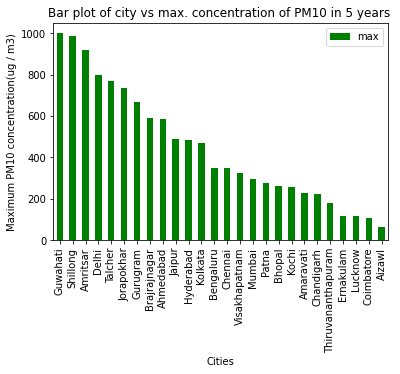

In [ ]:
result = df1['PM10'].agg([max])
result.sort_values(by=['max'],ascending=False).plot(kind='bar',color='green')
plt.xlabel("Cities")
plt.ylabel("Maximum PM10 concentration(ug / m3)")
plt.title("Bar plot of city vs max. concentration of PM10 in 5 years ")
plt.show()

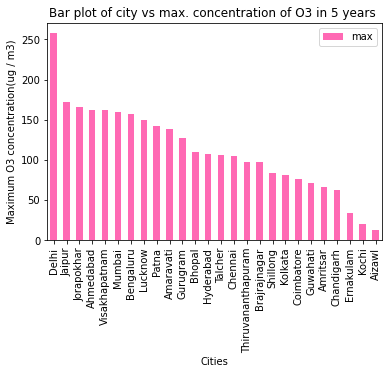

In [ ]:
result = df1['O3'].agg([max])
result.sort_values(by=['max'],ascending=False).plot(kind='bar',color='hotpink')
plt.xlabel("Cities")
plt.ylabel("Maximum O3 concentration(ug / m3)")
plt.title("Bar plot of city vs max. concentration of O3 in 5 years ")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


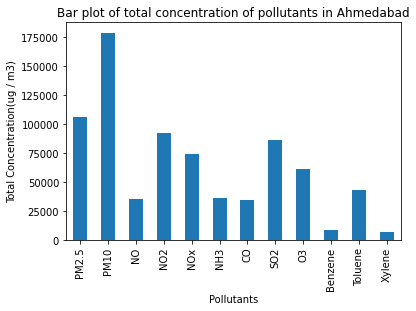

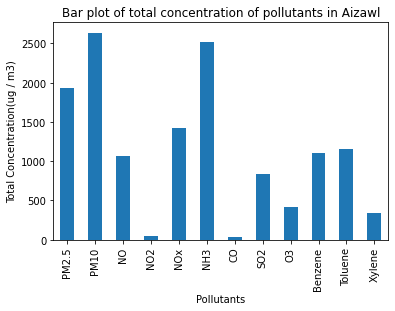

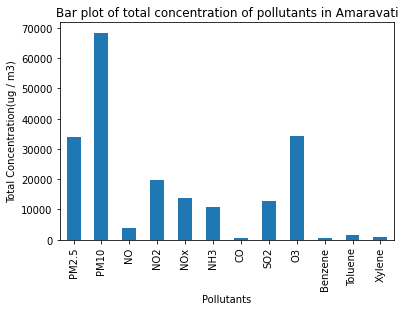

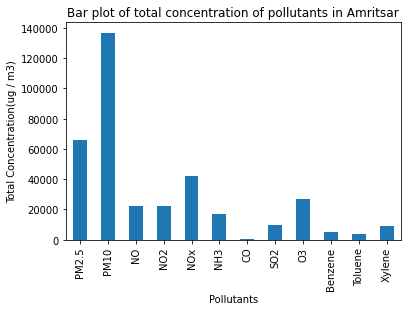

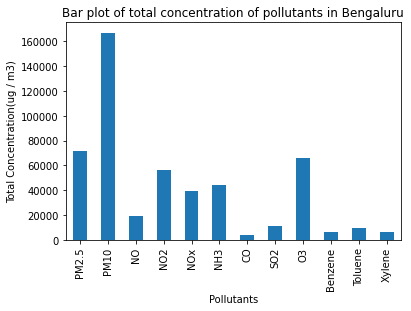

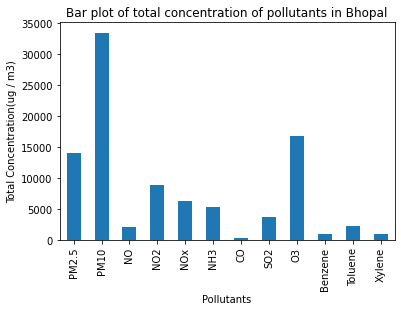

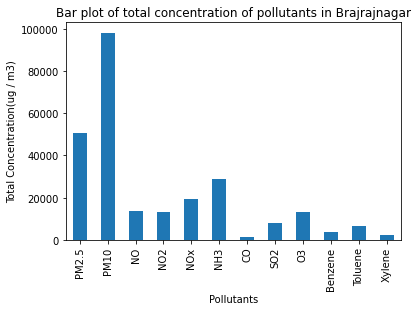

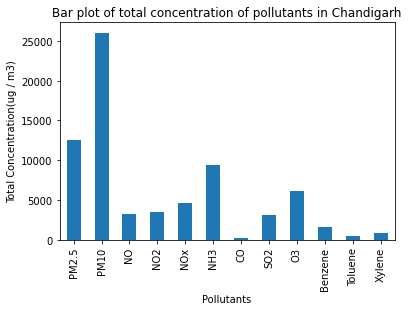

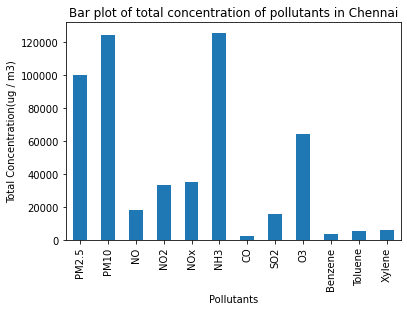

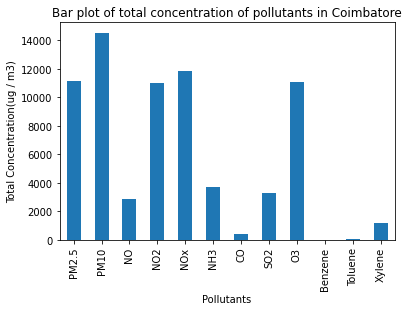

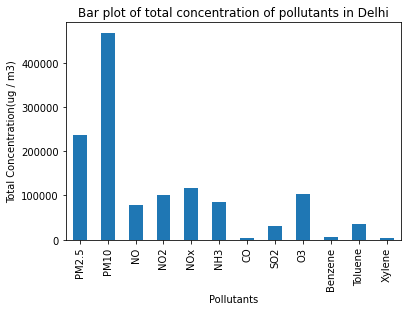

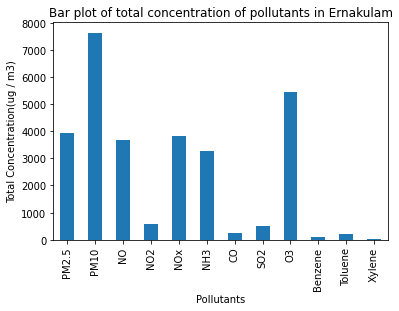

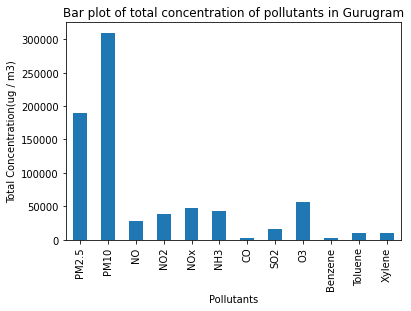

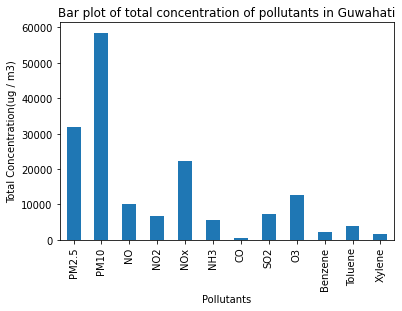

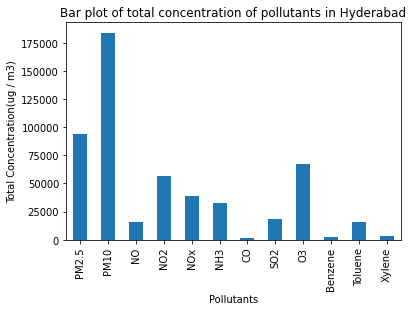

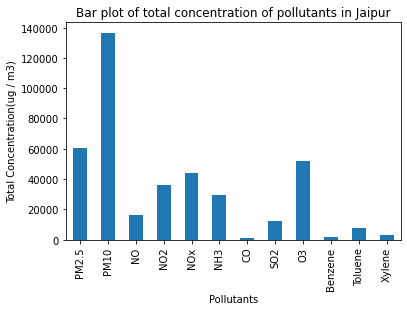

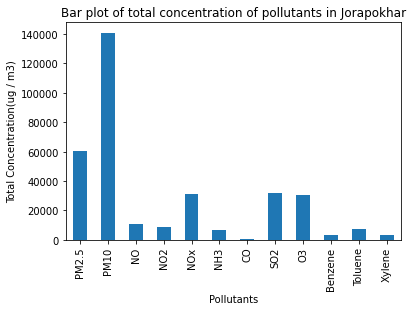

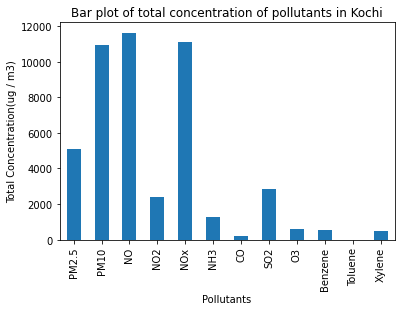

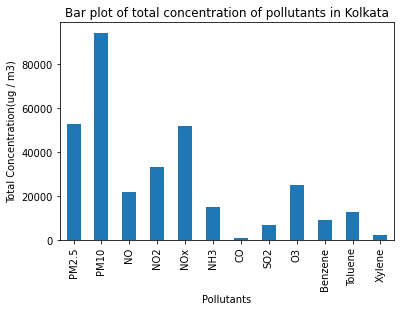

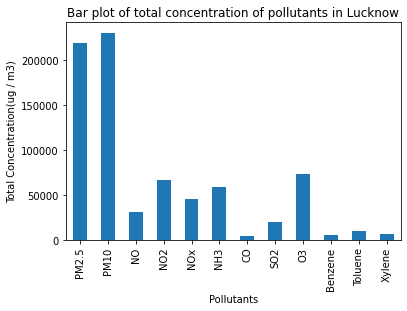

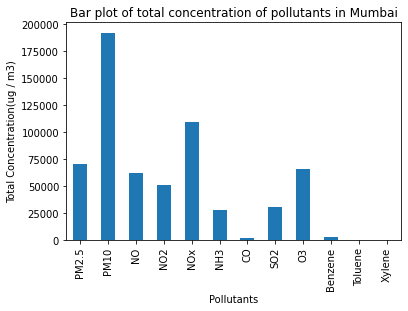

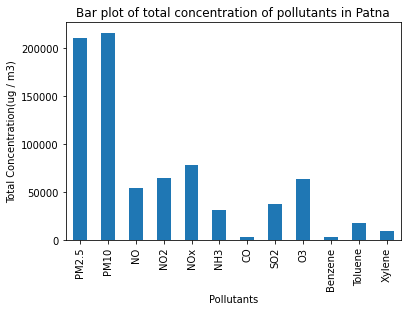

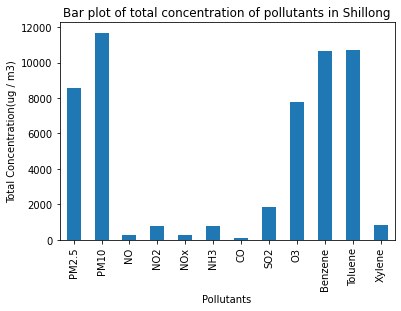

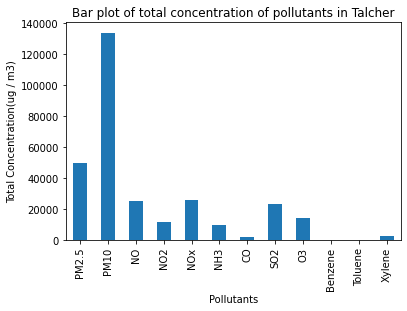

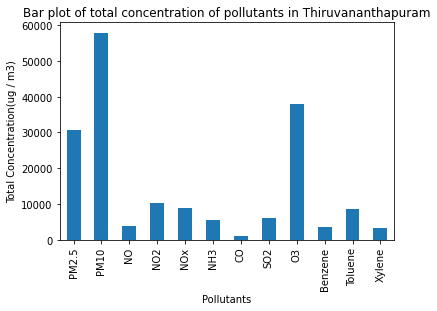

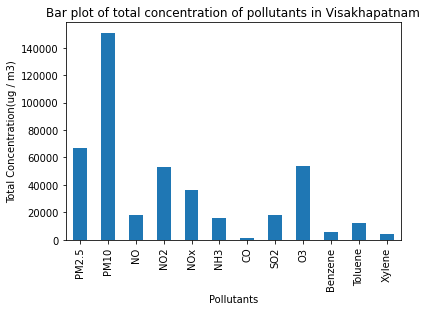

In [ ]:
x= df.groupby('City')['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'].sum()
for i in x.index:
  subset = x.loc[i]
  subset.plot(kind='bar')
  plt.xlabel("Pollutants")
  plt.ylabel("Total Concentration(ug / m3)")
  plt.title("Bar plot of total concentration of pollutants in {}".format(i))
  plt.show()

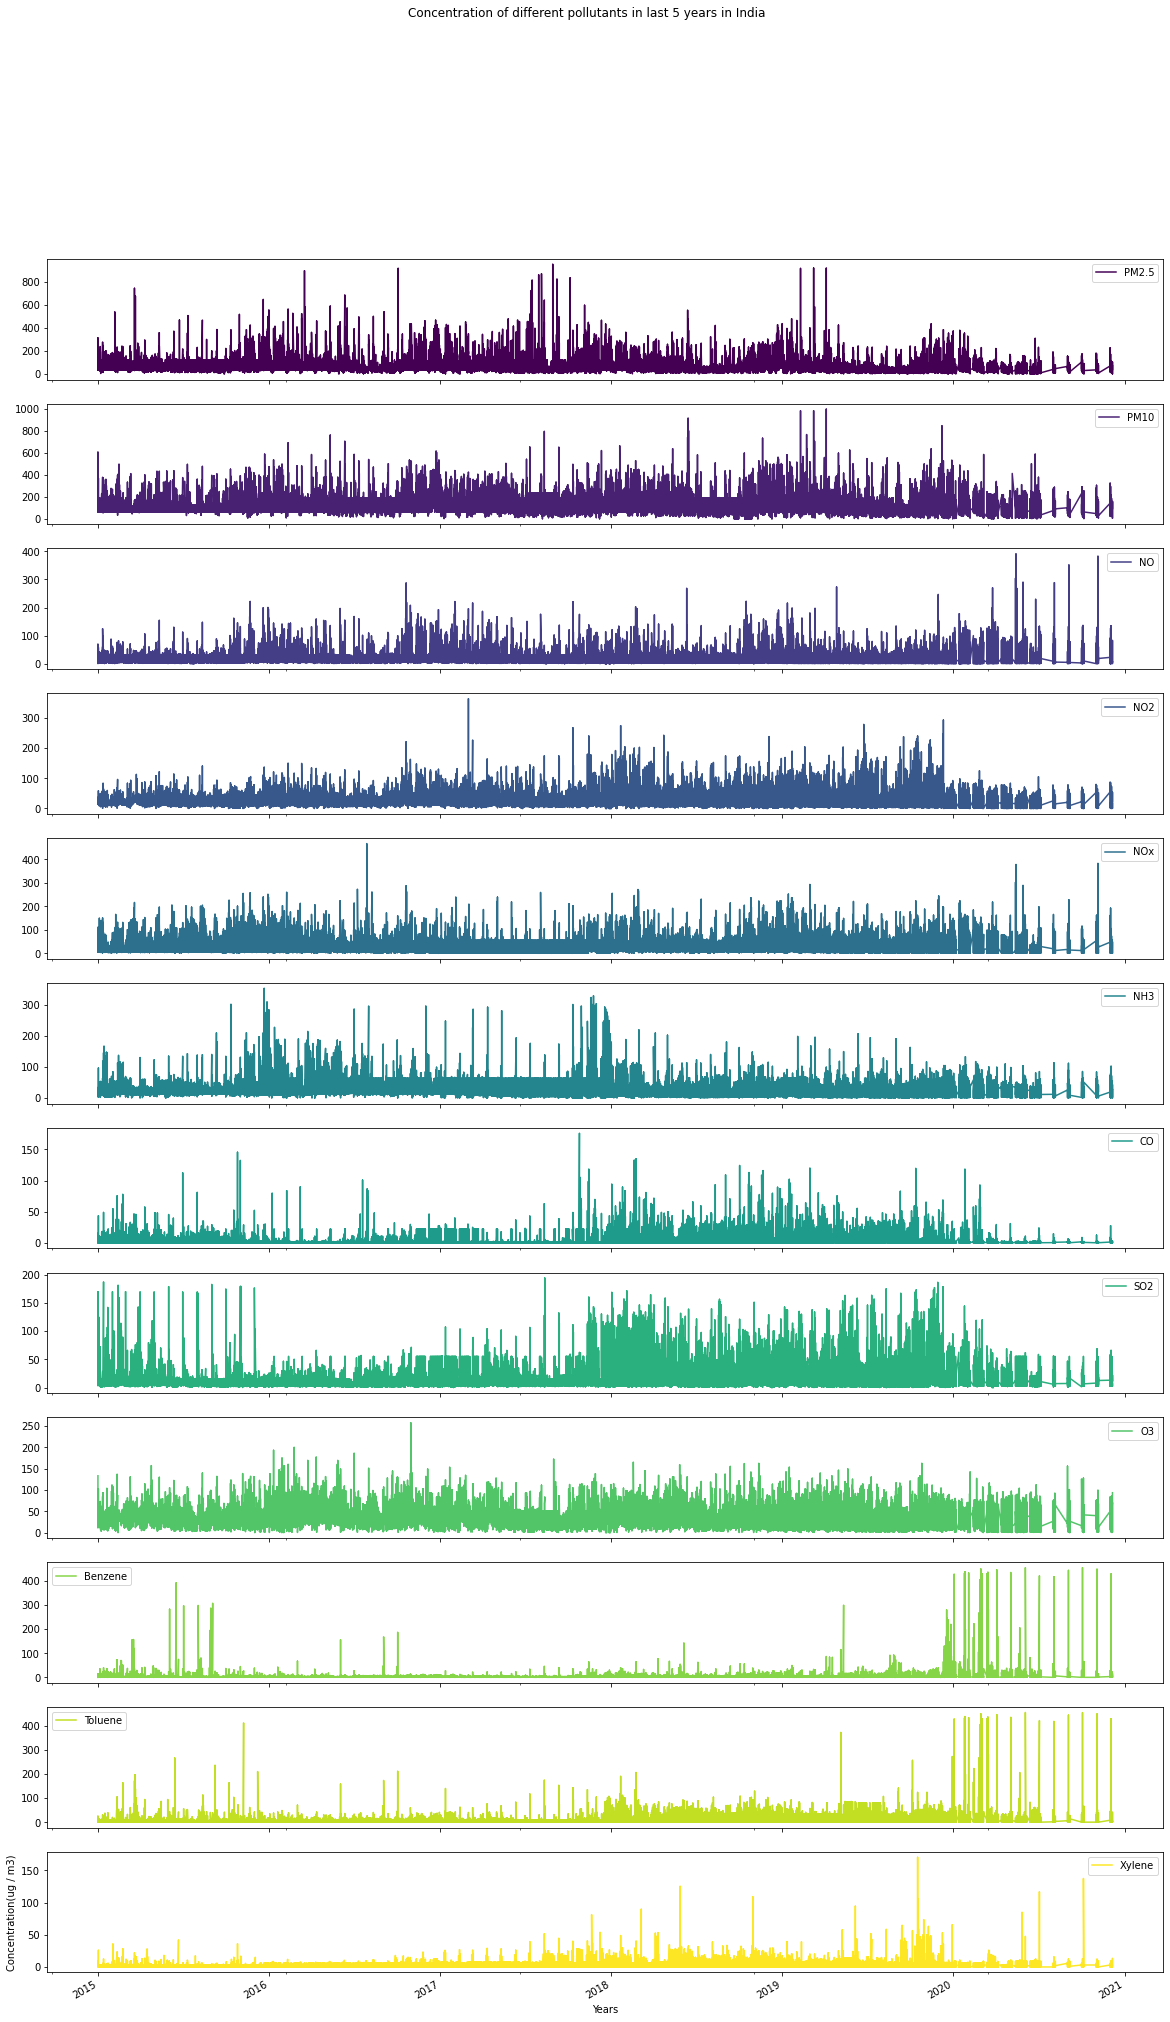

In [ ]:
subset_df.plot(kind='line',cmap='viridis',subplots=True,figsize=(20,35))
plt.xlabel('Years')
plt.ylabel("Concentration(ug / m3)")
plt.suptitle('Concentration of different pollutants in last 5 years in India')
plt.show()

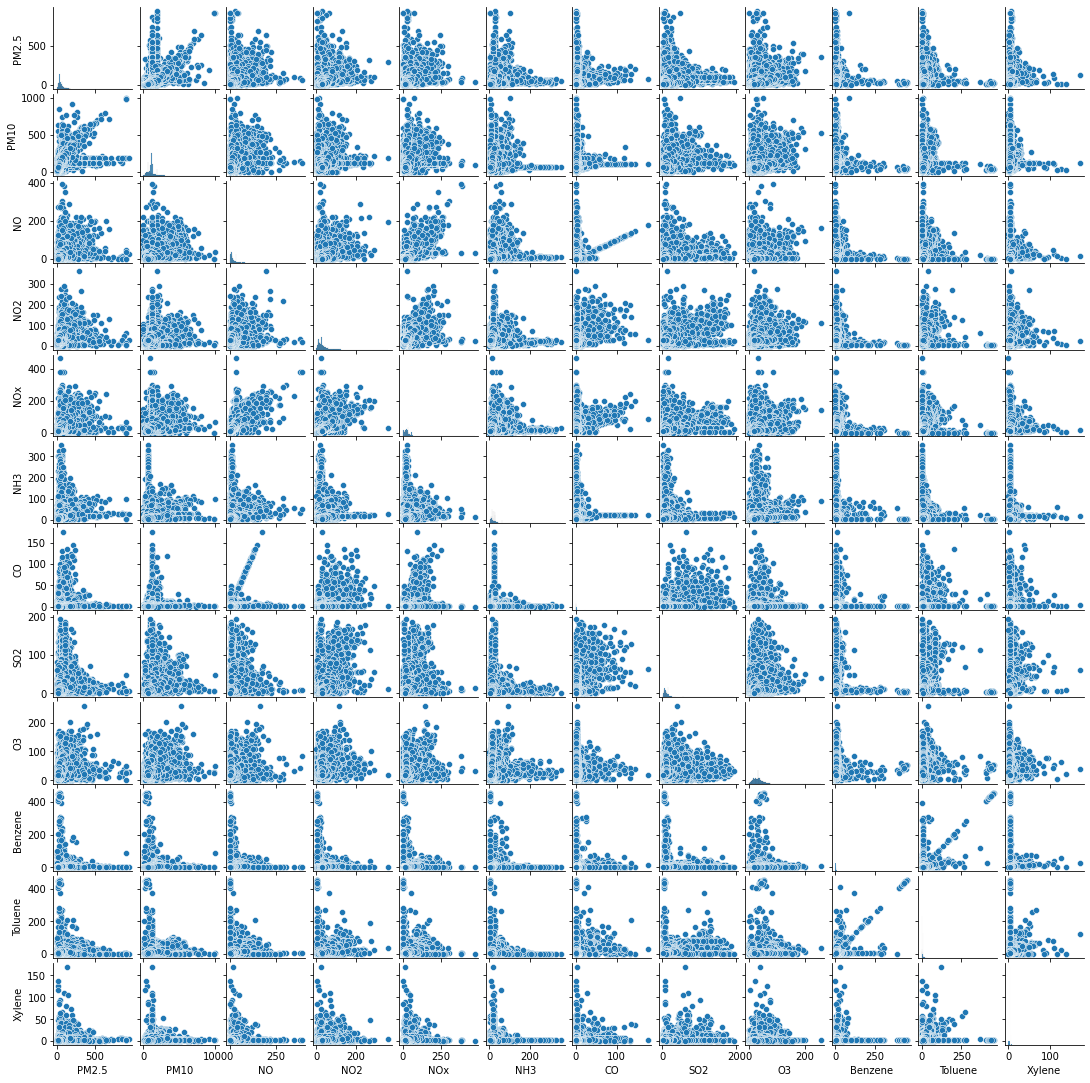

In [ ]:
p=sns.pairplot(subset_df)
p.fig.set_size_inches(15,15)
plt.show()

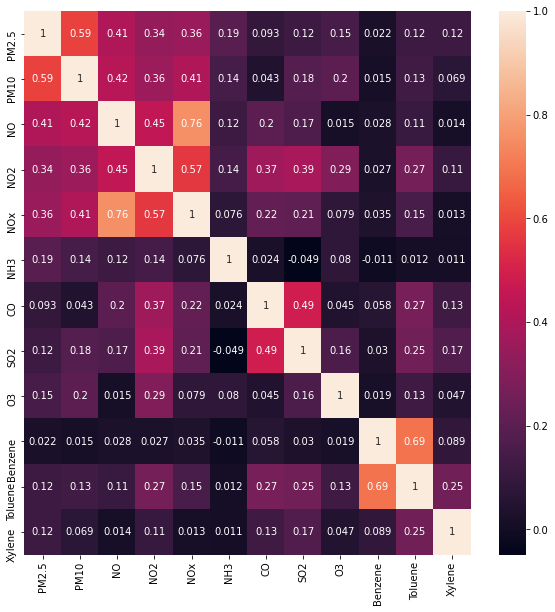

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.588551,0.406950,0.342141,0.356344,0.194351,0.093051,0.117805,0.151459,0.022068,0.123032,0.116297
PM10,0.588551,1.000000,0.423909,0.358919,0.408493,0.143925,0.042560,0.182306,0.203721,0.015264,0.129070,0.068571
NO,0.406950,0.423909,1.000000,0.449792,0.756022,0.116664,0.201739,0.165150,0.014834,0.027731,0.109800,0.014474
NO2,0.342141,0.358919,0.449792,1.000000,0.565136,0.141635,0.366621,0.386287,0.292542,0.026847,0.266321,0.106148
NOx,0.356344,0.408493,0.756022,0.565136,1.000000,0.076481,0.220892,0.212876,0.079189,0.034971,0.152751,0.013262
NH3,0.194351,0.143925,0.116664,0.141635,0.076481,1.000000,0.023532,-0.048667,0.079618,-0.010935,0.012180,0.011378
CO,0.093051,0.042560,0.201739,0.366621,0.220892,0.023532,1.000000,0.487898,0.045132,0.057963,0.267963,0.127427
SO2,0.117805,0.182306,0.165150,0.386287,0.212876,-0.048667,0.487898,1.000000,0.160487,0.029959,0.254290,0.168716
O3,0.151459,0.203721,0.014834,0.292542,0.079189,0.079618,0.045132,0.160487,1.000000,0.019446,0.127096,0.047173
Benzene,0.022068,0.015264,0.027731,0.026847,0.034971,-0.010935,0.057963,0.029959,0.019446,1.000000,0.692560,0.088930


In [ ]:
corr = subset_df.corr(method="pearson")
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,ax=ax)
plt.show()
display(corr)

**AQI CALCULATION**

In [ ]:
# PM2.5 Sub-Index calculation
def calc_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif  x <= 60:
        return 50 + (x - 30) * (100-50) / (60-30)
    elif x <= 90:
        return 100 + (x - 60) * (200-100) / (90-60)
    elif x <= 120:
        return 200 + (x - 90) * (300-200) / (120-90)
    elif x <= 250:
        return 300 + (x - 120) * (400-300) / (250-120)
    elif x > 250:
        return  400 + (x - 250) * (500-400) / (380-250)
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: calc_PM25_subindex(x))


In [ ]:
# PM10 Sub-Index calculation
def calc_PM10_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif  x <= 100:
        return 50 + (x - 50) * (100-50) / (100-50)
    elif x <= 250:
        return 100 + (x - 100) * (200-100) / (250-100)
    elif x <= 350:
        return 200 + (x - 250) * (300-200) / (350-250)
    elif x <= 430:
        return 300 + (x - 350) * (400-300) / (430-250)
    elif x > 430:
        return  400 + (x - 430) * (500-400) / (510-430)
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: calc_PM10_subindex(x))


In [ ]:
# SO2 Sub-Index calculation
def calc_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif  x <= 80:
        return 50 + (x - 40) * (100-50) / (80-40)
    elif x <= 380:
        return 100 + (x - 80) * (200-100) / (380-80)
    elif x <= 800:
        return 200 + (x - 380) * (300-200) / (800-380)
    elif x <= 1600:
        return 300 + (x - 800) * (400-300) / (1600-800)
    elif x > 1600:
        return  400 + (x - 1600) * (500-400) / (2400-1600)
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: calc_SO2_subindex(x))


In [ ]:
# NOx Sub-Index calculation
def calc_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif  x <= 80:
        return 50 + (x - 40) * (100-50) / (80-40)
    elif x <= 180:
        return 100 + (x - 80) * (200-100) / (180-80)
    elif x <= 280:
        return 200 + (x - 180) * (300-200) / (280-180)
    elif x <= 400:
        return 300 + (x - 280) * (400-300) / (400-280)
    elif x > 400:
        return  400 + (x - 400) * (500-400) / (520-400)
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: calc_NOx_subindex(x))


In [ ]:
# NH3 Sub-Index calculation
def calc_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif  x <= 400:
        return 50 + (x - 200) * (100-50) / (400-200)
    elif x <= 800:
        return 100 + (x - 400) * (200-100) / (1200-800)
    elif x <= 1200:
        return 200 + (x - 800) * (300-200) / (1800-1200)
    elif x <= 1800:
        return 300 + (x - 1200) * (400-300) / (1800-1200)
    elif x > 1800:
        return  400 + (x - 1800) * (500-400) / (2400-1800)
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: calc_NH3_subindex(x))


In [ ]:
# CO Sub-Index calculation
def calc_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif  x <= 2:
        return 50 + (x - 1) * (100-50) / (1)
    elif x <= 10:
        return 100 + (x - 2) * (200-100) / (10-2)
    elif x <= 17:
        return 200 + (x - 10) * (300-200) / (17-10)
    elif x <= 34:
        return 300 + (x - 17) * (400-300) / (34-17)
    elif x > 34:
        return  400 + (x - 34) * (500-400) / (51-34)
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: calc_CO_subindex(x))


In [ ]:
# O3 Sub-Index calculation
def calc_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif  x <= 100:
        return 50 + (x - 50) * (100-50) / (100-50)
    elif x <= 168:
        return 100 + (x - 100) * (200-100) / (168-100)
    elif x <= 208:
        return 200 + (x - 168) * (300-200) / (208-168)
    elif x <= 748:
        return 300 + (x - 208) * (400-300) / (748-208)
    elif x > 748:
        return  400 + (x - 400) * (500-400) / (1148-748)
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: calc_O3_subindex(x))


In [ ]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
display(df)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0,NaN,123.333333,109.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0,NaN,123.333333,109.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0,NaN,123.333333,109.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0,NaN,123.333333,109.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0,NaN,123.333333,109.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,25.000000,50.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,40.000000,74.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,36.666667,65.000000,10.00,22.50,2.50,0.000000,30.000000


In [ ]:
## AQI bucketing
def calc_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN


df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].astype(int).apply(lambda x: calc_AQI_bucket(x)))

display(df)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0,Moderate,123.333333,109.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0,Moderate,123.333333,109.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0,Poor,123.333333,109.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0,Moderate,123.333333,109.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0,Very Poor,123.333333,109.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,25.000000,50.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,40.000000,74.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,36.666667,65.000000,10.00,22.50,2.50,0.000000,30.000000


City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
PM2.5_SubIndex    0
PM10_SubIndex     0
SO2_SubIndex      0
NOx_SubIndex      0
NH3_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
dtype: int64


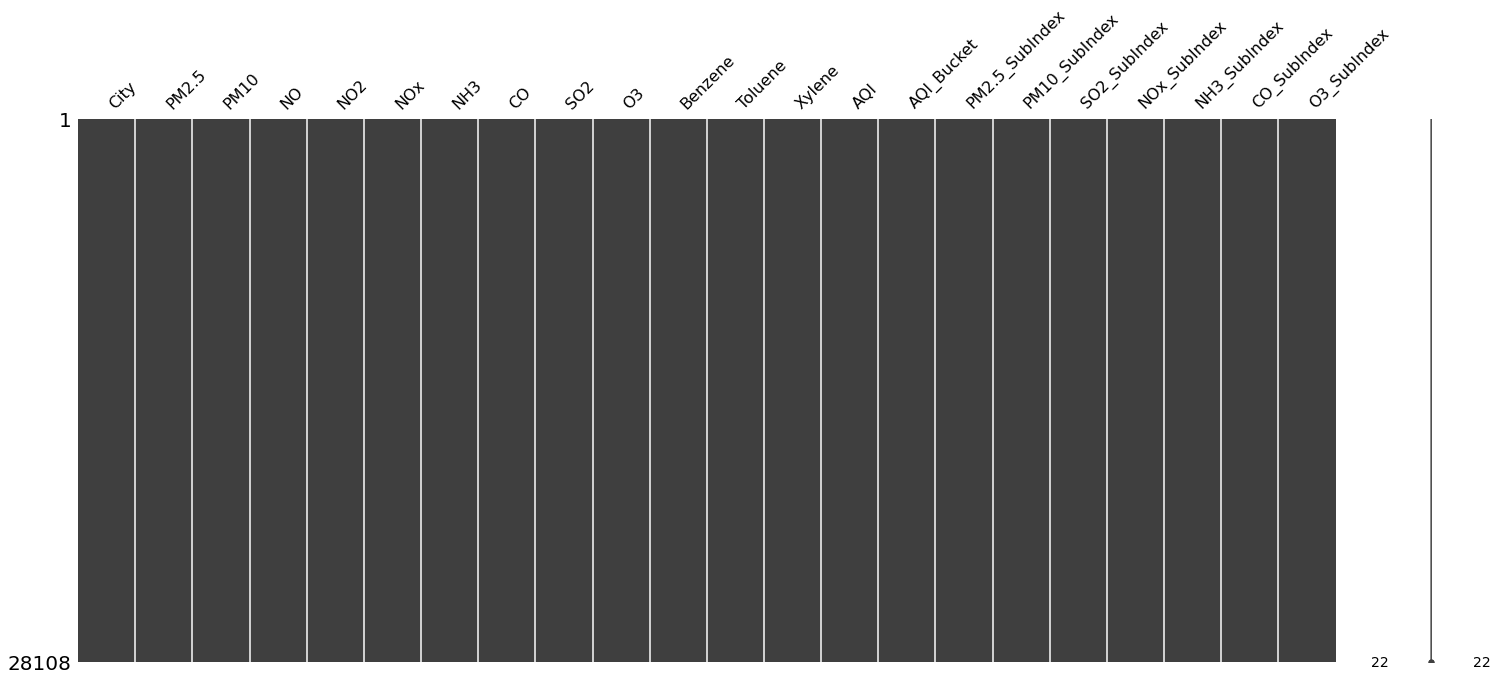

In [ ]:
print(df.isnull().sum())

msno.matrix(df)

In [ ]:
subset2_df = df.iloc[:,1:14]
display(subset2_df)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0
2015-02-01,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0
2015-03-01,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0
2015-04-01,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0
2015-05-01,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0
2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0
2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0


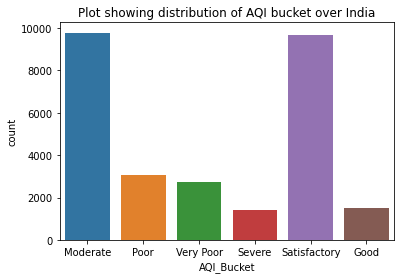

In [ ]:
plt.title('Plot showing distribution of AQI bucket over India')
sns.countplot(x ='AQI_Bucket', data = df)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,149.0
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,123.0
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,300.0
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,123.0
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,329.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0


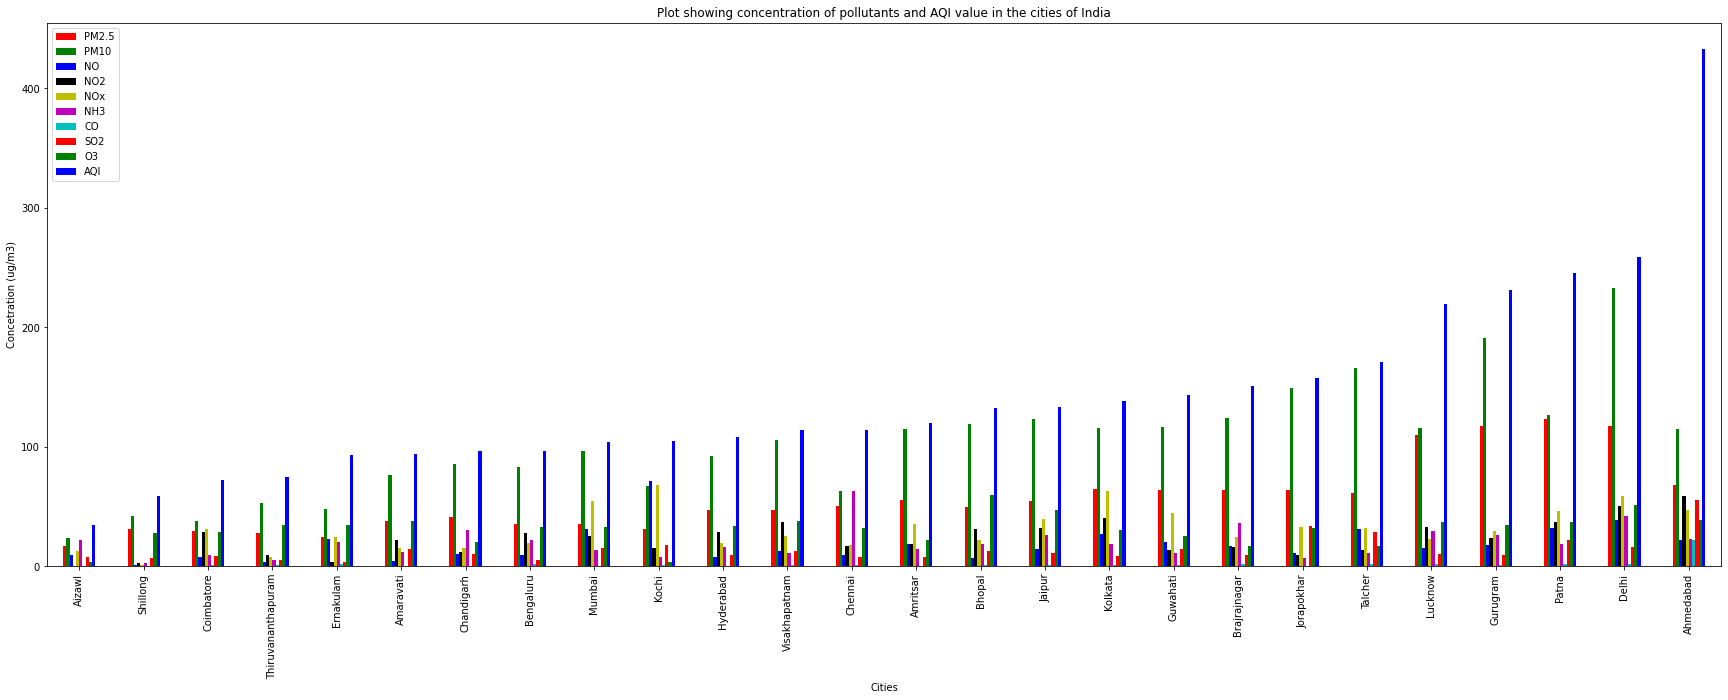

In [ ]:
subset3_df = df.loc[:,['City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3','AQI']]
display(subset3_df)
result  = subset3_df.groupby('City').mean()
my_colors = 'rgbkymc'
result.sort_values('AQI').plot(kind='bar',color=my_colors,figsize=(30,10))
plt.xlabel("Cities")
plt.ylabel("Concetration (ug/m3)")
plt.title('Plot showing concentration of pollutants and AQI value in the cities of India')
plt.show()

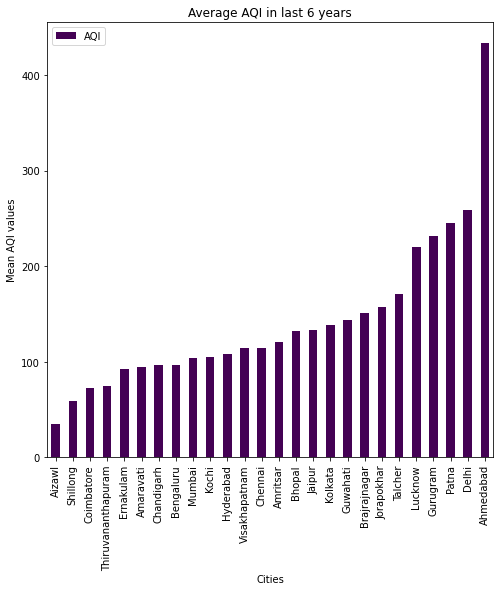

In [ ]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='viridis',figsize=(8,8))
plt.title('Average AQI in last 6 years')
plt.xlabel("Cities")
plt.ylabel("Mean AQI values")
plt.show()

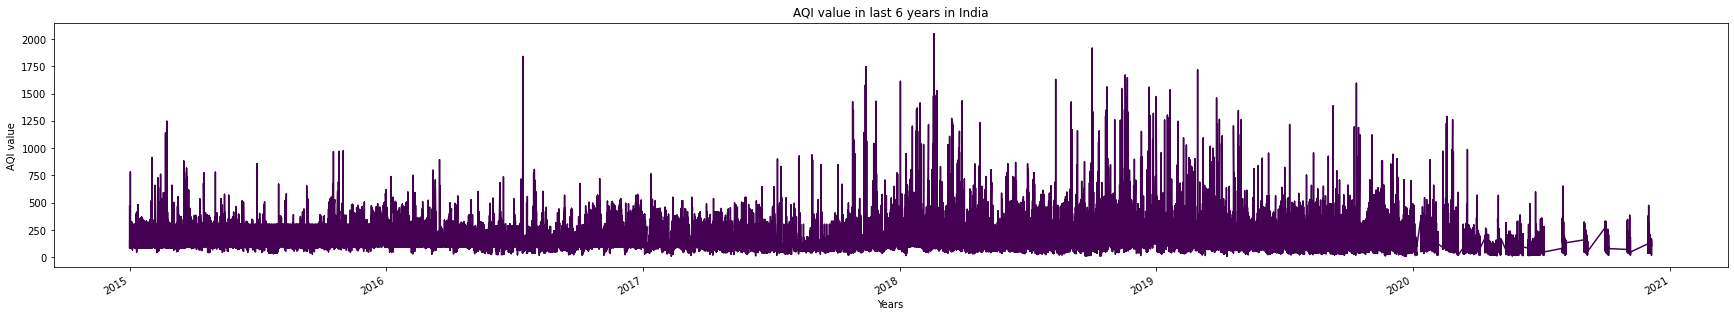

In [ ]:
subset3_df['AQI'].plot(kind='line',cmap='viridis',subplots=True,figsize=(30,5))
plt.xlabel('Years')
plt.ylabel("AQI value")
plt.title('AQI value in last 6 years in India')
plt.show()

In [ ]:
subset4_df = df.loc[:,['AQI','AQI_Bucket']]
print(subset4_df)
subset4_df['AQI_Bucket'].unique()

              AQI    AQI_Bucket
Date                           
2015-01-01  149.0      Moderate
2015-02-01  123.0      Moderate
2015-03-01  300.0          Poor
2015-04-01  123.0      Moderate
2015-05-01  329.0     Very Poor
...           ...           ...
2020-06-27   41.0          Good
2020-06-28   70.0  Satisfactory
2020-06-29   68.0  Satisfactory
2020-06-30   54.0  Satisfactory
2020-01-07   50.0          Good

[28108 rows x 2 columns]


array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
final_df = pd.concat([df, subset3_df],axis=1)
display(final_df)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0,Moderate,123.333333,109.333333,33.75,21.25,5.75,0.000000,148.529412,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,149.0
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0,Moderate,123.333333,109.333333,30.00,20.00,5.75,0.000000,34.000000,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,123.0
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0,Poor,123.333333,109.333333,36.25,36.25,5.75,300.000000,30.000000,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,300.0
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0,Moderate,123.333333,109.333333,22.50,21.25,5.75,50.000000,36.000000,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,123.0
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0,Very Poor,123.333333,109.333333,48.75,46.25,5.75,329.411765,39.000000,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,25.000000,50.000000,10.00,23.75,3.00,0.000000,23.000000,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,41.0
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,40.000000,74.000000,15.00,20.00,2.75,0.000000,30.000000,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,70.0
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,36.666667,65.000000,10.00,22.50,2.50,0.000000,30.000000,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,68.0


In [ ]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) 
final_df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,0.00,0.02,0.00,149.0,2,123.333333,109.333333,33.75,21.25,5.75,0.000000,148.529412,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.213073,0.92,27.64,133.36,149.0
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,3.68,5.50,3.77,123.0,2,123.333333,109.333333,30.00,20.00,5.75,0.000000,34.000000,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.213073,0.97,24.55,34.06,123.0
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,6.80,16.40,2.25,300.0,3,123.333333,109.333333,36.25,36.25,5.75,300.000000,30.000000,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.213073,17.40,29.07,30.70,300.0
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,4.43,10.14,1.00,123.0,2,123.333333,109.333333,22.50,21.25,5.75,50.000000,36.000000,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.213073,1.70,18.59,36.08,123.0
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,7.01,18.89,2.78,329.0,4,123.333333,109.333333,48.75,46.25,5.75,329.411765,39.000000,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.213073,22.10,39.33,39.31,329.0


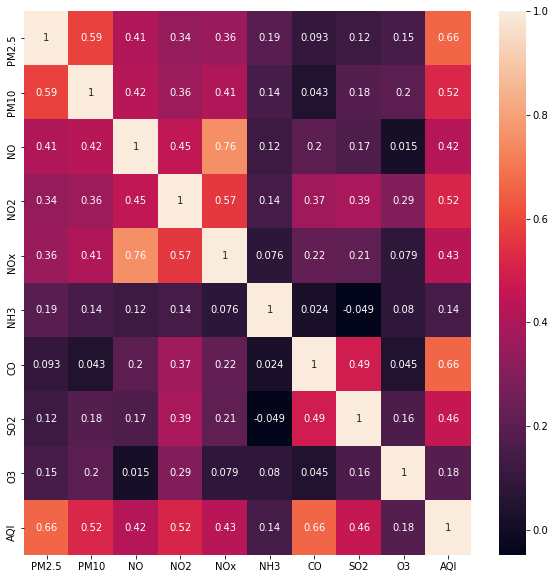

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
PM2.5,1.000000,0.588551,0.406950,0.342141,0.356344,0.194351,0.093051,0.117805,0.151459,0.663352
PM10,0.588551,1.000000,0.423909,0.358919,0.408493,0.143925,0.042560,0.182306,0.203721,0.519831
NO,0.406950,0.423909,1.000000,0.449792,0.756022,0.116664,0.201739,0.165150,0.014834,0.416868
NO2,0.342141,0.358919,0.449792,1.000000,0.565136,0.141635,0.366621,0.386287,0.292542,0.515989
NOx,0.356344,0.408493,0.756022,0.565136,1.000000,0.076481,0.220892,0.212876,0.079189,0.429148
NH3,0.194351,0.143925,0.116664,0.141635,0.076481,1.000000,0.023532,-0.048667,0.079618,0.140466
CO,0.093051,0.042560,0.201739,0.366621,0.220892,0.023532,1.000000,0.487898,0.045132,0.663806
SO2,0.117805,0.182306,0.165150,0.386287,0.212876,-0.048667,0.487898,1.000000,0.160487,0.459855
O3,0.151459,0.203721,0.014834,0.292542,0.079189,0.079618,0.045132,0.160487,1.000000,0.184611
AQI,0.663352,0.519831,0.416868,0.515989,0.429148,0.140466,0.663806,0.459855,0.184611,1.000000


In [ ]:
corr = subset3_df.corr(method="pearson")
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,ax=ax)
plt.show()
display(corr)

In [ ]:
#Extracting Independent and dependent Variable  
x= final_df.loc[:,['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3']].values
y= final_df.loc[:,'AQI'].values
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

from sklearn.linear_model import LinearRegression 
from sklearn import metrics

lm = LinearRegression(normalize=True) #building linear regression model
model = lm.fit(x_train,y_train)

print("Intercept: ",model.intercept_)

y_pred = lm.predict(x_test) #we fit the model on the training data and predict the values for the testing data
print("R^2 score: ",metrics.r2_score(y_test, y_pred)) #measures accuracy of our modelc

Intercept:  [7.03636222 7.03636222]
R^2 score:  0.8391735499964789


In [ ]:
#Extracting Independent and dependent Variable  
x= final_df.loc[:,'AQI'].values  
y= final_df.loc[:,'AQI_Bucket'].values  

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print("Confusion matrix : ")
print(cm)

from sklearn.metrics import accuracy_score
print("Accuracy score : ",accuracy_score(y_test, y_pred))


Confusion matrix : 
[[ 477    0    0    0    0    0]
 [   0 2874    0    0    0    0]
 [   0    0 2967    0    0    0]
 [   0    0    0  908    0    0]
 [   0    0    0    0  790    0]
 [   0    0    0    0    0  417]]
Accuracy score :  1.0


In [ ]:
#Extracting Independent and dependent Variable  
x= final_df.loc[:,'AQI'].values  
y= final_df.loc[:,'AQI_Bucket'].values  

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
classifier = RandomForestClassifier(random_state = 0).fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#Predicting the test set result  
y_pred= classifier.predict(x_test)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print("Confusion matrix : ")
print(cm)

from sklearn.metrics import accuracy_score
print("Accuracy score : ",accuracy_score(y_test, y_pred))


Confusion matrix : 
[[ 405    0    0    0    0    0]
 [   0 2405    0    0    0    0]
 [   0    0 2447    0    0    0]
 [   0    0    0  759    0    0]
 [   0    0    0    0  663    0]
 [   0    0    0    0    0  348]]
Accuracy score :  1.0


COVID-19 

In [ ]:
display(subset3_df['City'].unique())

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
cities = ['Bengaluru','Mumbai','Delhi','Gurugram','Lucknow']
covid_df = subset3_df[subset3_df.index >= '2020-01-01']
covid_df = covid_df[covid_df.City.isin(cities)]
display(covid_df)
covid_AQI = covid_df.pivot(index=None, columns='City',values='AQI')
covid_AQI.fillna(method='bfill', inplace=True)
display(covid_AQI)


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,
2020-01-01,Bengaluru,30.71,70.80,9.03,27.31,26.74,13.01,1.07,8.56,37.39,82.0
2020-02-01,Bengaluru,25.78,62.73,8.81,28.05,30.18,12.40,1.16,7.52,33.11,81.0
2020-03-01,Bengaluru,29.66,69.62,6.62,26.26,26.92,12.87,0.99,6.40,32.98,85.0
2020-04-01,Bengaluru,52.62,106.81,15.46,31.56,41.89,14.59,1.39,6.94,37.35,95.0
2020-05-01,Bengaluru,52.64,97.94,6.86,29.10,29.52,15.68,1.01,7.01,45.10,118.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Mumbai,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,5.68,64.0
2020-06-28,Mumbai,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,5.76,64.0
2020-06-29,Mumbai,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,5.84,54.0


City,Bengaluru,Delhi,Gurugram,Lucknow,Mumbai
Date,,,,,
2020-01-01,82.0,492.0,429.0,442.0,194.0
2020-01-02,102.0,244.0,159.0,224.0,154.0
2020-01-03,101.0,105.0,115.0,148.0,125.0
2020-01-04,64.0,80.0,81.0,116.0,63.0
2020-01-05,74.0,140.0,155.0,82.0,61.0
...,...,...,...,...,...
2020-12-02,80.0,343.0,302.0,253.0,136.0
2020-12-03,97.0,125.0,115.0,112.0,80.0
2020-12-04,64.0,102.0,107.0,151.0,86.0


Analyzing Effect of Covid-19 on AQI

          Date       City  PM2.5    PM10  ...    CO    SO2     O3    AQI
0   2020-01-01  Bengaluru  30.71   70.80  ...  1.07   8.56  37.39   82.0
1   2020-02-01  Bengaluru  25.78   62.73  ...  1.16   7.52  33.11   81.0
2   2020-03-01  Bengaluru  29.66   69.62  ...  0.99   6.40  32.98   85.0
3   2020-04-01  Bengaluru  52.62  106.81  ...  1.39   6.94  37.35   95.0
4   2020-05-01  Bengaluru  52.64   97.94  ...  1.01   7.01  45.10  118.0
..         ...        ...    ...     ...  ...   ...    ...    ...    ...
910 2020-06-27     Mumbai  18.04   63.72  ...  0.43  10.36   5.68   64.0
911 2020-06-28     Mumbai  12.33   44.84  ...  0.38  10.58   5.76   64.0
912 2020-06-29     Mumbai   7.88   27.51  ...  0.38  11.11   5.84   54.0
913 2020-06-30     Mumbai   4.66   13.87  ...  0.36  13.40   6.94   54.0
914 2020-01-07     Mumbai   3.84   11.28  ...  0.37  13.18   6.68   53.0

[915 rows x 12 columns]


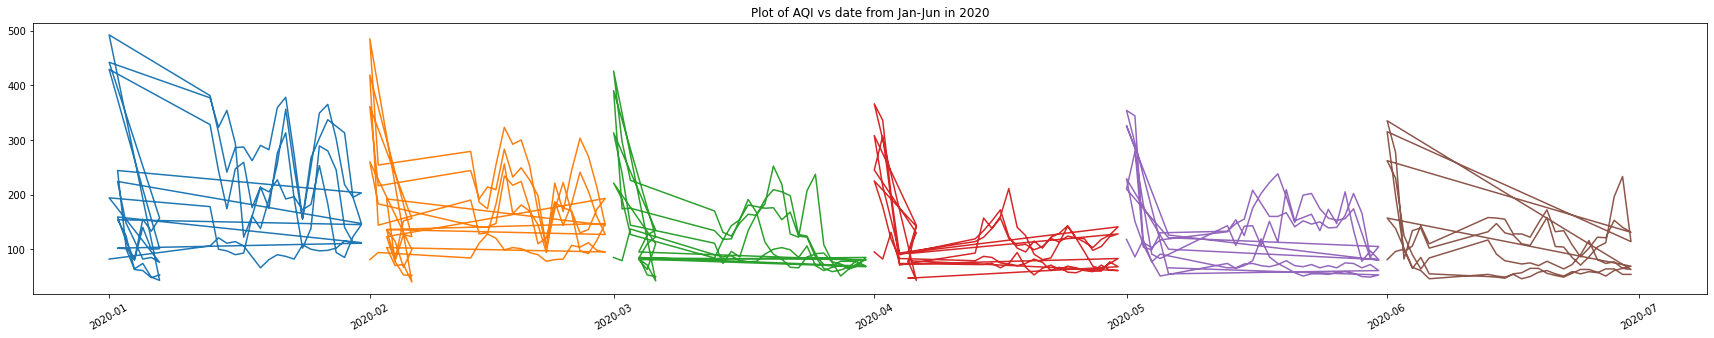

In [ ]:
covid_df.reset_index(level=0, inplace=True)
print(covid_df)
plt.figure(figsize=(30,5))
for x in range(1,7):
  plt.plot(covid_df[(covid_df.Date.dt.month== x) & 
                    (covid_df.Date.dt.year == 2020)]['Date'],
          covid_df[(covid_df.Date.dt.month == x) & 
                    (covid_df.Date.dt.year == 2020)]['AQI'])
  plt.xticks(rotation=30)
  plt.title("Plot of AQI vs date from Jan-Jun in 2020")

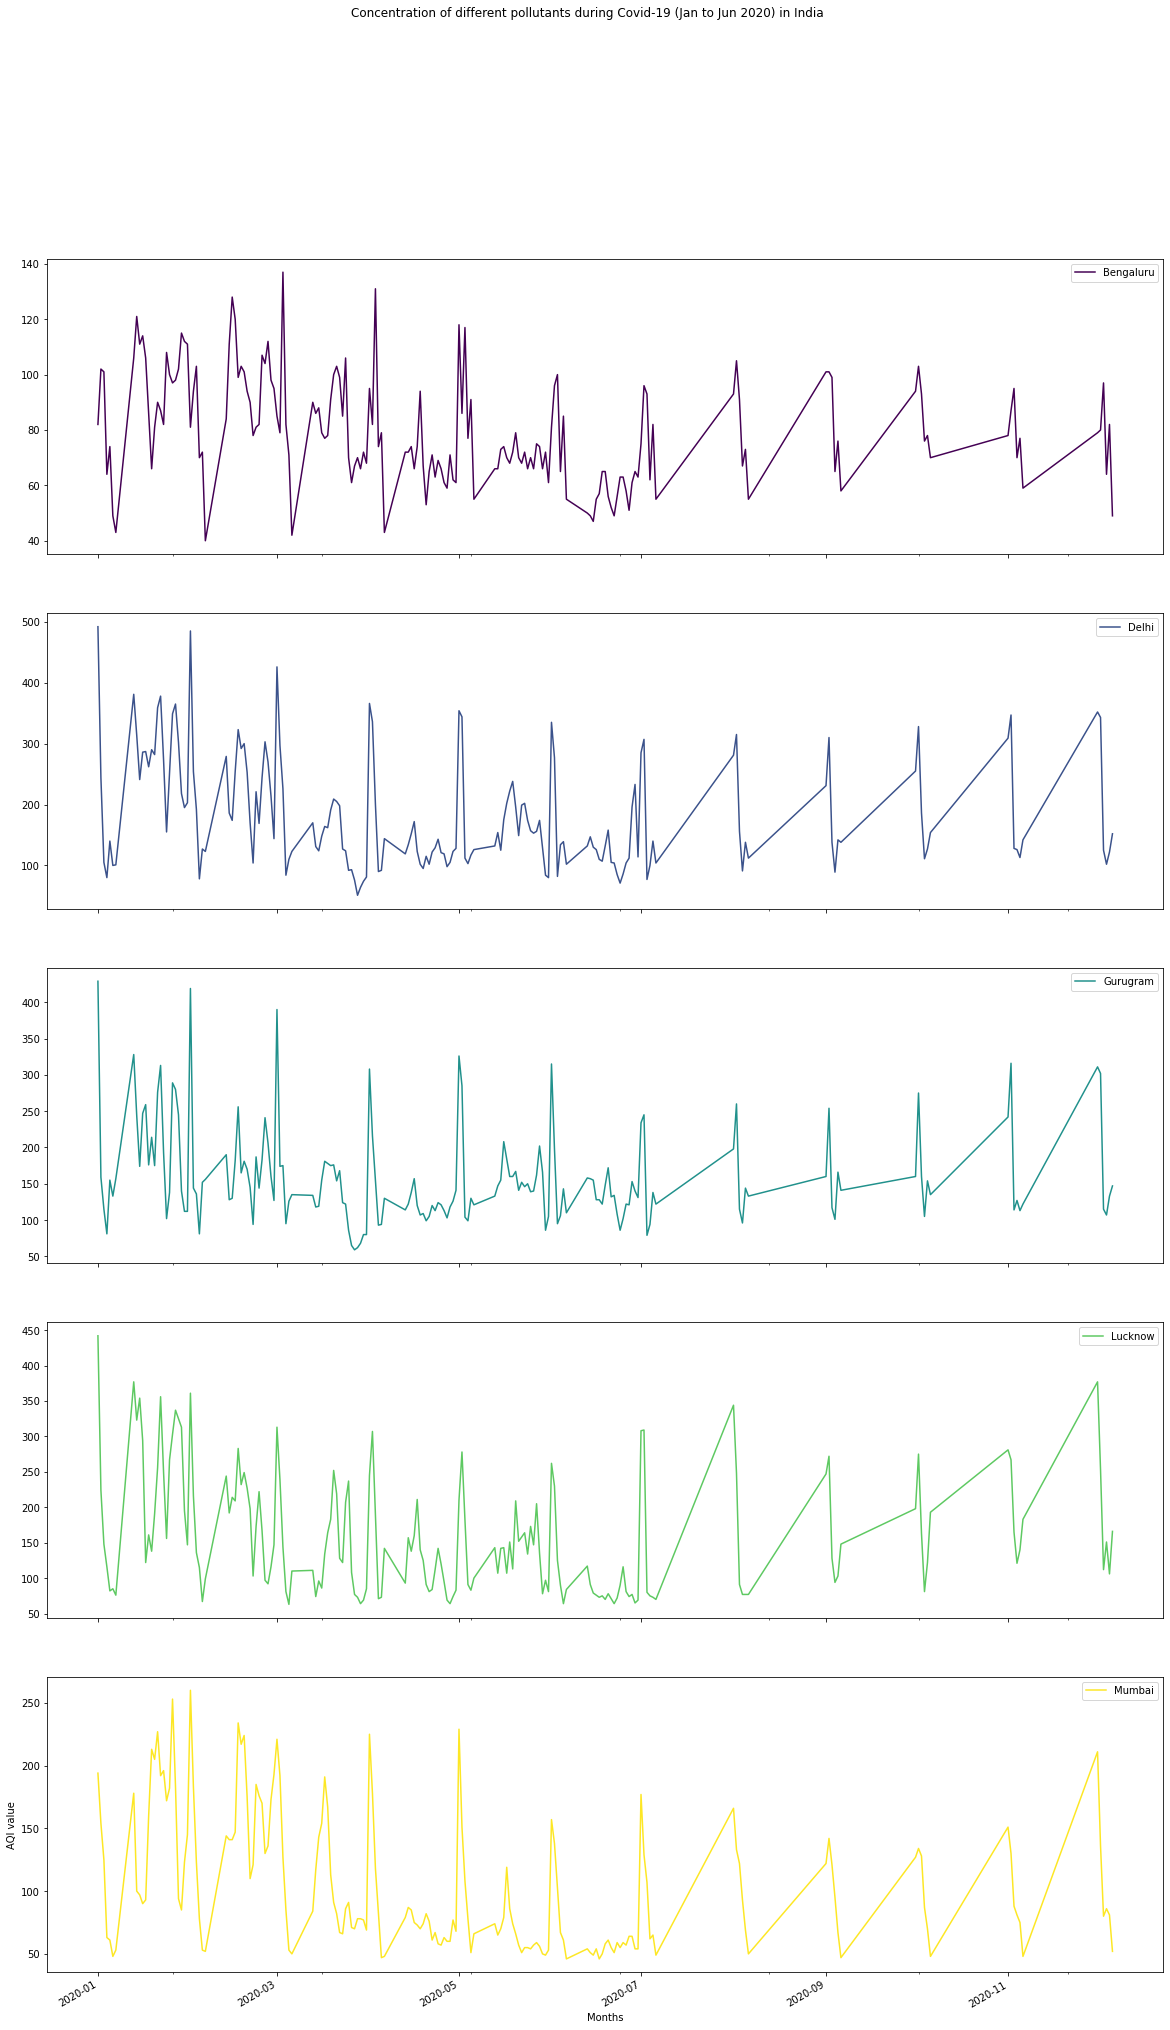

In [ ]:
covid_AQI.plot(kind='line',cmap='viridis',subplots=True,figsize=(20,35))
plt.xlabel('Months')
plt.ylabel("AQI value")
plt.suptitle('Concentration of different pollutants during Covid-19 (Jan to Jun 2020) in India')
plt.show()

In [ ]:
m = ['JAN','FEB','MARCH','APRIL','MAY','JUNE']
for y in cities:
  for x in range(1,7):
    Mean_AQI = covid_df[(covid_df.Date.dt.month == x) & 
                      (covid_df.Date.dt.year == 2020) & 
                      (covid_df['City']==y)]['AQI'].mean()
    print("Mean_AQI_for_{}_2020- Month {} : ".format(y,m[x-1]),Mean_AQI)
  print("\n")

Mean_AQI_for_Bengaluru_2020- Month JAN :  92.61538461538461
Mean_AQI_for_Bengaluru_2020- Month FEB :  93.34782608695652
Mean_AQI_for_Bengaluru_2020- Month MARCH :  82.08
Mean_AQI_for_Bengaluru_2020- Month APRIL :  71.83333333333333
Mean_AQI_for_Bengaluru_2020- Month MAY :  74.88
Mean_AQI_for_Bengaluru_2020- Month JUNE :  62.791666666666664


Mean_AQI_for_Mumbai_2020- Month JAN :  141.76923076923077
Mean_AQI_for_Mumbai_2020- Month FEB :  155.04347826086956
Mean_AQI_for_Mumbai_2020- Month MARCH :  104.92
Mean_AQI_for_Mumbai_2020- Month APRIL :  82.125
Mean_AQI_for_Mumbai_2020- Month MAY :  76.48
Mean_AQI_for_Mumbai_2020- Month JUNE :  65.25


Mean_AQI_for_Delhi_2020- Month JAN :  255.8846153846154
Mean_AQI_for_Delhi_2020- Month FEB :  224.30434782608697
Mean_AQI_for_Delhi_2020- Month MARCH :  150.0
Mean_AQI_for_Delhi_2020- Month APRIL :  142.91666666666666
Mean_AQI_for_Delhi_2020- Month MAY :  170.28
Mean_AQI_for_Delhi_2020- Month JUNE :  138.375


Mean_AQI_for_Gurugram_2020- Month JAN :